In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer

In [107]:
file_path = "/Users/keerthi/Documents/github_datasets/heart-attack-risk-prediction-dataset.csv" 
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.info())
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9377 non-null   float64
 4   Family History                   9377 non-null   float64
 5   Smoking                          9377 non-null   float64
 6   Obesity                          9377 non-null   float64
 7   Alcohol Consumption              9377 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9377 non-null   float64
 11  Medication Use                   9377 non-null   float64
 12  St

In [108]:
# Check for missing values
print("Missing values before imputation:\n", df.isnull().sum())

Missing values before imputation:
 Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           274
Family History                     274
Smoking                            274
Obesity                            274
Alcohol Consumption                274
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            274
Medication Use                     274
Stress Level                       274
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    274
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Heart Attack Risk (Text)             0
Gender                       

In [109]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Heart Attack Risk (Binary)", "Heart Attack Risk (Text)"])  # Drop target & text labels
y = df["Heart Attack Risk (Binary)"]  # Target variable

In [110]:
# Convert "Gender" to numerical (Male = 1, Female = 0)
X["Gender"] = X["Gender"].map({"Male": 1, "Female": 0})

In [111]:
# Impute missing values in numerical columns with the median
imputer = SimpleImputer(strategy="median")
X_numeric = X.select_dtypes(include=["number"])  # Select numerical columns
X_numeric_imputed = imputer.fit_transform(X_numeric)  # Apply imputation

In [112]:
# Impute missing values in "Gender" with the most common value (mode)
X["Gender"].fillna(X["Gender"].mode()[0], inplace=True)

In [113]:
# Convert X back to a DataFrame
X_imputed = pd.DataFrame(X_numeric_imputed, columns=X_numeric.columns)
X_imputed["Gender"] = X["Gender"]  # Re-add Gender after imputation

# Verify no missing values:
print("Missing values after imputation:\n", X_imputed.isnull().sum())

Missing values after imputation:
 Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
dtype: int64


In [114]:
cleaned_file_path = "/Users/keerthi/Documents/github_datasets/cleaned_heart_attack_dataset.csv"
X_imputed.to_csv(cleaned_file_path, index=False)

In [115]:
sns.set(style="whitegrid")

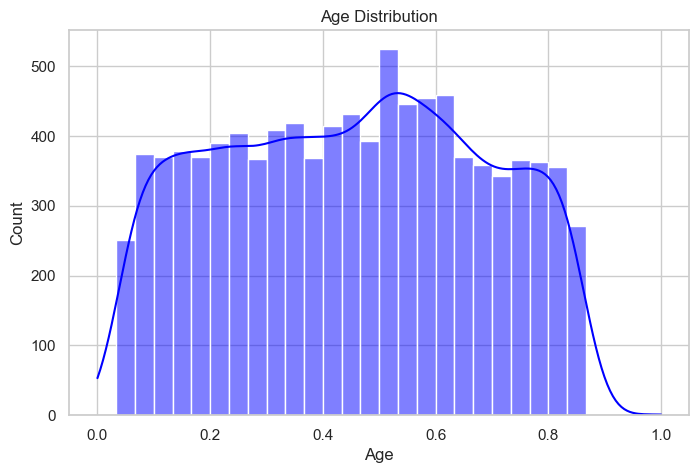

In [116]:
# Plot Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

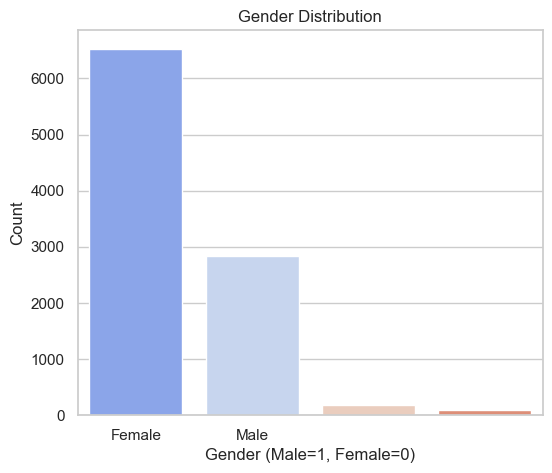

In [117]:
# Plot Gender Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x=df["Gender"], palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (Male=1, Female=0)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

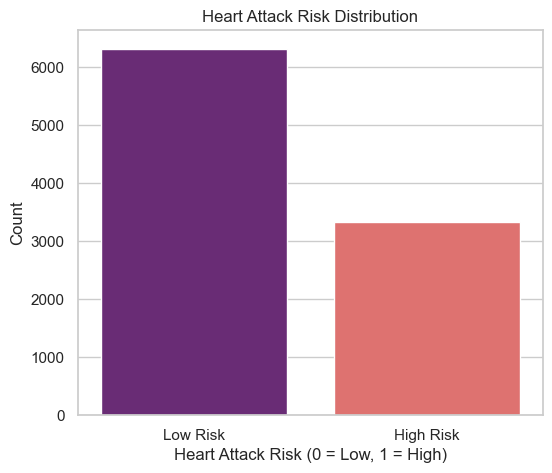

In [118]:
# Plot Heart Attack Risk Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x=df["Heart Attack Risk (Binary)"], palette="magma")
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Low Risk", "High Risk"])
plt.show()

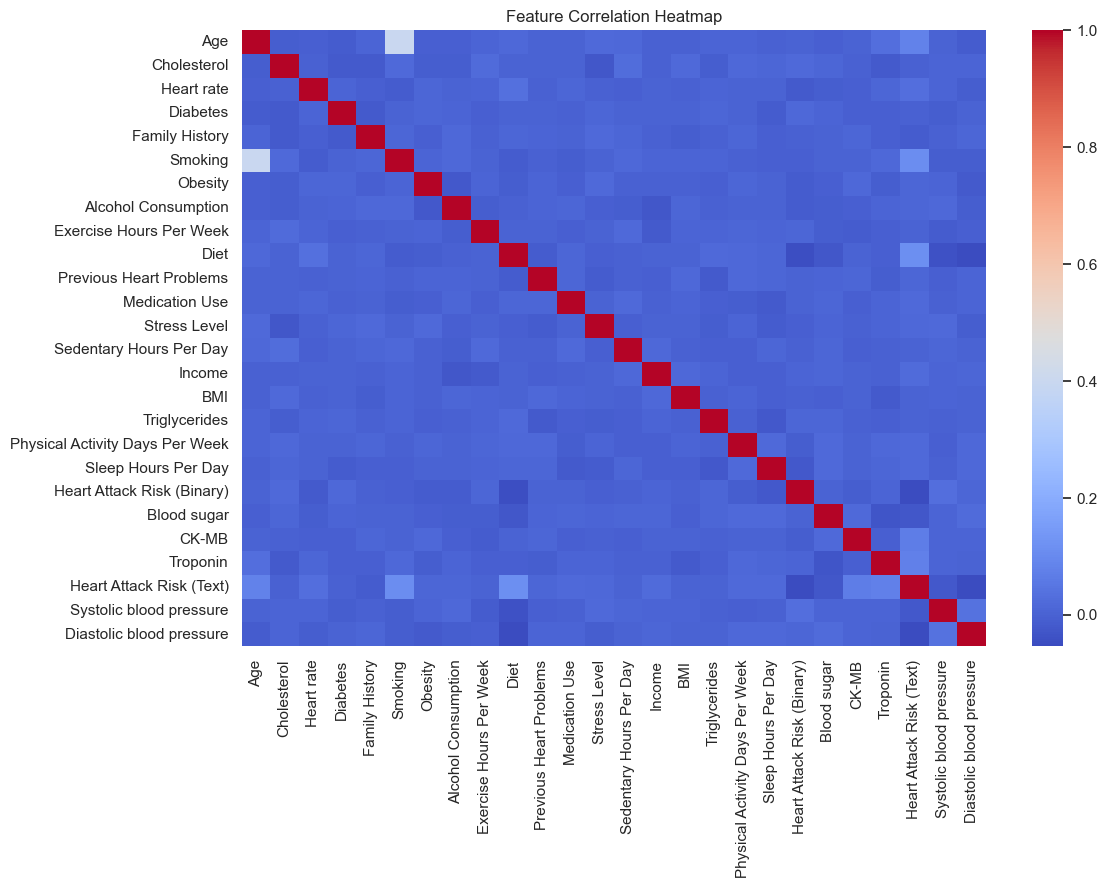

In [119]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

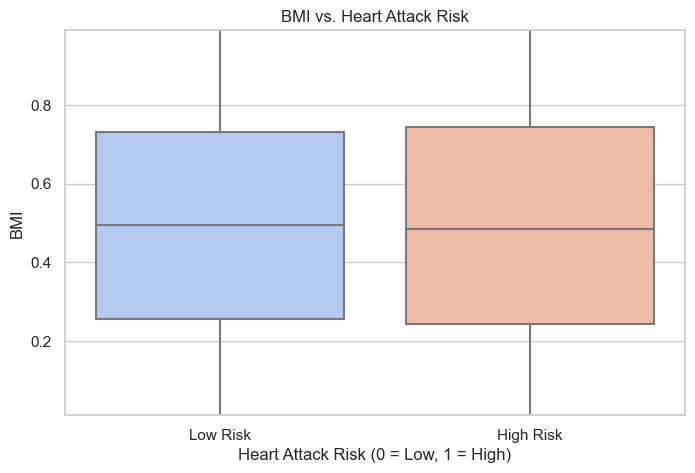

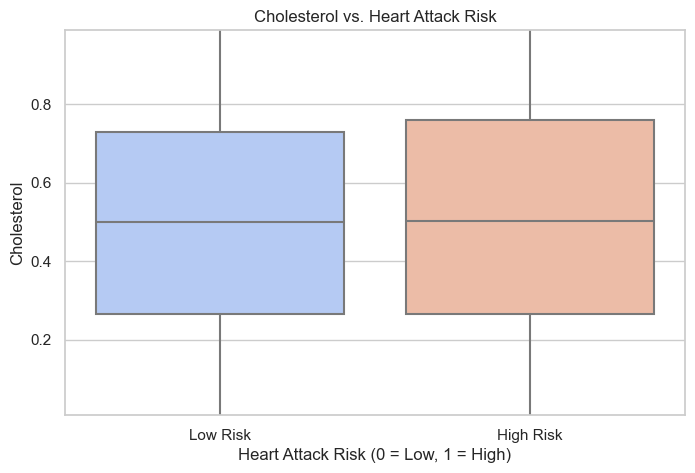

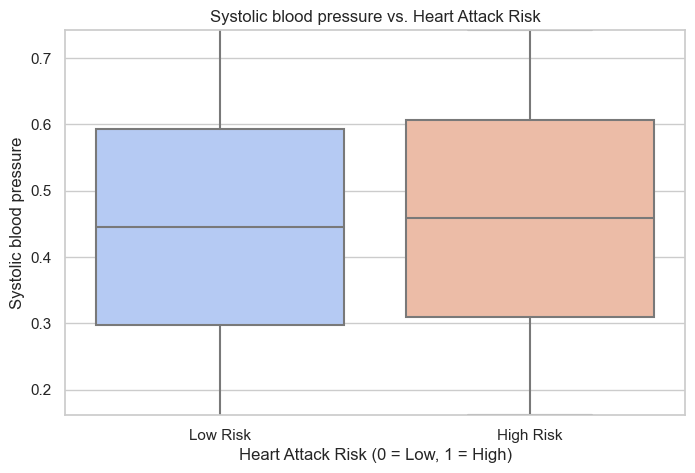

In [120]:
# Boxplots for Specific Variables vs. Heart Attack Risk
for feature in ["BMI", "Cholesterol", "Systolic blood pressure"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["Heart Attack Risk (Binary)"], y=df[feature], palette="coolwarm")
    plt.ylim(df[feature].quantile(0.01), df[feature].quantile(0.99))  # Adjust scale
    plt.title(f"{feature} vs. Heart Attack Risk")
    plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=["Low Risk", "High Risk"])
    plt.show()

In [121]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [123]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [124]:
# Model 3: XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

/Users/keerthi/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [125]:
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC-ROC score
    
    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print(classification_report(y_test, y_pred))

evaluate_model(log_reg, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")


📊 Logistic Regression Performance:
Accuracy: 0.6535
AUC-ROC Score: 0.5218
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79      1265
         1.0       0.20      0.00      0.00       666

    accuracy                           0.65      1931
   macro avg       0.43      0.50      0.40      1931
weighted avg       0.50      0.65      0.52      1931


📊 Random Forest Performance:
Accuracy: 0.6722
AUC-ROC Score: 0.5835
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.80      1265
         1.0       0.70      0.09      0.15       666

    accuracy                           0.67      1931
   macro avg       0.69      0.53      0.47      1931
weighted avg       0.68      0.67      0.57      1931


📊 XGBoost Performance:
Accuracy: 0.6183
AUC-ROC Score: 0.5797
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.74      1265
         1.0       0.41      0

In [126]:
# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

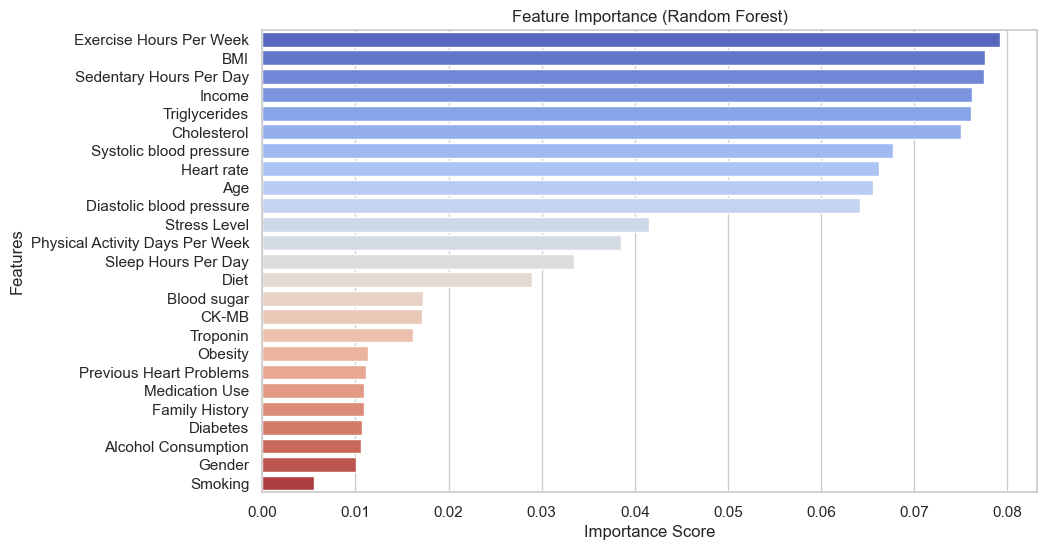

In [127]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [128]:
import pickle

# Save the trained Random Forest model
with open("heart_attack_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [129]:
app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model
with open("heart_attack_model.pkl", "rb") as file:
    model = pickle.load(file)

# Load the scaler
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

# Streamlit UI
st.title("💓 Heart Attack Risk Prediction")
st.write("Enter patient details to predict heart attack risk.")

age = st.number_input("Age", min_value=20, max_value=100, step=1)
cholesterol = st.number_input("Cholesterol Level", min_value=100, max_value=500, step=1)
heart_rate = st.number_input("Heart Rate", min_value=40, max_value=180, step=1)
diabetes = st.selectbox("Diabetes", [0, 1])
smoking = st.selectbox("Smoking", [0, 1])
obesity = st.selectbox("Obesity", [0, 1])
alcohol = st.selectbox("Alcohol Consumption", [0, 1])
exercise = st.slider("Exercise Hours Per Week", 0.0, 20.0, 3.0)
bmi = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1)
blood_pressure = st.number_input("Systolic Blood Pressure", min_value=90, max_value=200, step=1)
gender = st.radio("Gender", ["Male", "Female"])

gender = 1 if gender == "Male" else 0

input_data = pd.DataFrame([[age, cholesterol, heart_rate, diabetes, smoking, obesity, alcohol, exercise, bmi, blood_pressure, gender]],
                          columns=["Age", "Cholesterol", "Heart rate", "Diabetes", "Smoking", "Obesity", "Alcohol Consumption",
                                   "Exercise Hours Per Week", "BMI", "Systolic blood pressure", "Gender"])

input_scaled = scaler.transform(input_data)

if st.button("Predict Heart Attack Risk"):
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        st.error(f"⚠️ High Risk! Probability: {probability:.2%}")
    else:
        st.success(f"✅ Low Risk. Probability: {probability:.2%}")
"""

# Save to a Python file
with open("app.py", "w") as file:
    file.write(app_code)

print("Streamlit app.py file created successfully!")


Streamlit app.py file created successfully!
